In [2]:
import numpy as np
import skimage
from skimage import data
from skimage.color import rgb2gray
#from natsort import natsorted, ns
import os as os
from skimage import io
from matplotlib import pyplot as plt
from PIL import Image
import pytesseract
import cv2
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

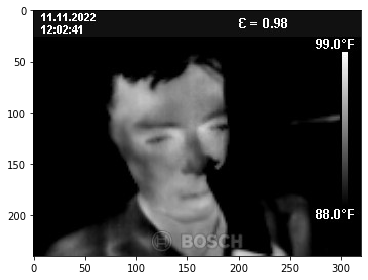

In [3]:
#imports images

list_files = os.listdir('subj018') #change to folder name
#print(list_files)
#list_files = natsorted(list_files)
image_list = []

for filename in list_files:
    image_list.append(io.imread("subj018\\" + filename)) #change to folder name

io.imshow(image_list[21])
#io.imshow(image_list[19][12:25,0:55])

In [4]:
#reads color of pixels

image_listarr = []
for image in image_list:
    image_listarr = np.asarray(image)
width = 240 #rows
length = 320 #cols
levels_list = []

for i in np.arange(np.shape(image_list)[0]):
    black_level_arr = np.zeros([width,length])
    #print(np.ceil((i+1)/21*100), "% done")
    image = image_list[i]
    for x in np.arange(width-1):
        for y in np.arange(length-1):
            value = image[x,y]
            #print(value)
            black_level = value[0] / 255
            black_level_arr[x,y] = black_level
    levels_list.append(black_level_arr)

In [10]:
x_coord = input("Looking at the image, give a focal x coord for measurement ")
x_coord = int(x_coord)
y_coord = input("Looking at the image, give a focal y coord for measurement ")
y_coord = 240 - int(y_coord)
maxtemp = input("Give the upper temperature limit of the recording ")
maxtemp = float(maxtemp)
mintemp = input("Give the lower temperature limit of the recording ")
mintemp = float(mintemp)
pixrad = input("Give the desired pixel radius of measurement ")
pixrad = int(pixrad)

Looking at the image, give a focal x coord for measurement 175
Looking at the image, give a focal y coord for measurement 150
Give the upper temperature limit of the recording 99
Give the lower temperature limit of the recording 88
Give the desired pixel radius of measurement 1


In [5]:
#determines timestamps
def extract_timestamp(image):
    # Page segmentation mode, PSM was changed to 6 since each page is a single uniform text block.
    custom_config = r'--psm 6 --oem 3 -c tessedit_char_whitelist=0123456789:'
    im = Image.fromarray(image[12:25,0:55])
    image = im.save("123.png")
    # load the image as grayscale
    img = cv2.imread("123.png",cv2.IMREAD_GRAYSCALE)

    # Change all pixels to black or white
    img[img > 128] = 255
    img[img <= 128] = 0

    # Scale it 10x
    scaled = cv2.resize(img, (0,0), fx=20, fy=20, interpolation = cv2.INTER_CUBIC)
    #io.imshow(scaled)

    # Retained your bilateral filter
    filtered = cv2.bilateralFilter(scaled, 11, 17, 17)

    # Thresholded OTSU method
    thresh = cv2.threshold(filtered, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Erode the image to bulk it up for tesseract
    kernel = np.ones((5,5),np.uint8)
    eroded = cv2.erode(thresh, kernel, iterations = 2)

    pre_processed = eroded

    # Feed the pre-processed image to tesseract and print the output.
    ocr_text = pytesseract.image_to_string(pre_processed, config=custom_config)
    if len(ocr_text) != 0: 
        return (ocr_text)
    else: return "no timestamp detected"

timestamps = []
nums = []
for image in image_list:
    num = extract_timestamp(image)
    nums.append(num)
    time_m = (int(num[0:2])*60)+int(num[3:5])+(int(num[6:8])/60)
    #print(time_m)
    timestamps.append(time_m)
time0 = timestamps[0]
print(nums, ",")
for i in np.arange(len(timestamps)):
    timestamps[i] = float(timestamps[i])-float(time0)
    
timestamps= np.array(timestamps)
#print(timestamps)

TesseractNotFoundError: C:\Program Files\Tesseract-OCR\tesseract.exe is not installed or it's not in your PATH. See README file for more information.

[94.9, 95.5, 95.5, 95.9, 94.9, 94.6, 95.4, 95.3, 95.2, 95.2, 95.4, 95.6, 95.9, 95.9, 94.8, 95.4, 95.3, 95.0, 95.4, 95.2, 95.6, 95.5, 95.7, 94.7, 95.1, 95.3, 95.1, 95.1, 94.8, 94.6, 94.6, 94.8, 93.9, 94.2, 94.1, 94.2, 94.3, 94.9, 95.3, 95.6, 95.1, 95.2, 95.6, 95.4, 96.5, 97.0, 94.8, 95.3, 94.6, 94.6, 94.4, 94.4, 94.5, 93.9, 93.4, 93.5, 93.4, 94.1, 93.7, 93.9, 93.8, 94.1, 94.2, 94.3, 94.1, 93.9, 93.9, 94.2, 94.3, 94.2, 94.0, 93.9, 93.4, 94.3, 93.4, 93.9, 94.0, 93.8, 94.0, 93.9, 93.6, 93.8, 94.4, 93.7, 94.2, 94.1, 93.8, 93.8, 93.8, 93.7, 93.8, 93.7, 92.9, 93.3, 92.9, 93.0, 93.4, 93.3, 93.0, 93.2, 92.8, 92.9, 93.4, 93.6, 93.4, 93.1, 92.6, 92.4, 93.2, 93.0, 93.4, 93.7, 92.7, 92.9, 92.9, 93.5, 92.9, 92.8, 92.5, 93.2, 93.0, 93.3, 93.2, 93.5, 93.2, 93.5, 94.1, 94.2, 94.9, 94.1, 94.8, 94.7, 94.5, 94.8, 94.4, 94.7, 94.4, 94.3]


<Figure size 504x216 with 0 Axes>

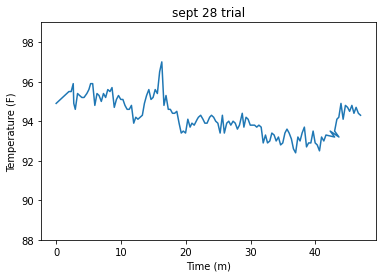

<Figure size 504x216 with 0 Axes>

In [11]:
#converts colors to temperature and plots

temps=[]
i=0
for item in levels_list:
    #print(i)
    #image = np.reshape(image, [240,320])
    region = item[(y_coord-pixrad):(y_coord+pixrad), (x_coord-pixrad):(x_coord+pixrad)]
    #print(region)
    avg = np.average(region)
    value = mintemp + avg*(maxtemp-mintemp)
    value = round(value, 1)
    temps.append(value)
    i+=1
print(temps)
x_range = np.linspace(0,(len(temps))/3, len(temps))
    
plt.figure(1)
plt.title("sept 28 trial") #change based on desired name
plt.xlabel("Time (m)")
plt.ylabel("Pic Number")
plt.ylabel("Temperature (F)")
plt.ylim([88,99])
#plt.plot(x_range,temps)  
plt.plot(timestamps,temps)
#plt.plot(temps[:-1])  
plt.figure(figsize=(7,3))

In [5]:
# importing the module
#import cv2
  
# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):
 
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ',', y)
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)
 
    # checking for right mouse clicks    
    if event==cv2.EVENT_RBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r),
                    (x,y), font, 1,
                    (255, 255, 0), 2)
        cv2.imshow('image', img)
        
 
    

width = 240 #rows
length = 320 #cols

temps=[]
for i in np.arange(np.shape(image_list)[0]):
    im = Image.fromarray(image_list[i])
    image = im.save("123.png")
    #print(np.ceil((i+1)/21*100), "% done")

#determines coordinates for the image
    #driver function
    if __name__=="__main__":
 
        # reading the image
        img = cv2.imread('123.png', 1)

        # displaying the image
        cv2.imshow('123.png', img)

        # setting mouse handler for the image
        # and calling the click_event() function
        cv2.setMouseCallback('123.png', click_event)

        # wait for a key to be pressed to exit
        cv2.waitKey(0)

        # close the window
        cv2.destroyAllWindows()

#references coordinates with previously created black_levels arrays to get a value which is converted to a temp
    value = levels_list[i][y_coord,x_coord]
    value = mintemp + value*(maxtemp-mintemp)
    value = round(value, 1)
    temps.append(value)

186 , 136


NameError: name 'y_coord' is not defined